<h1>Introduction: Twitter Classification of Nepal earthquake tweets</h1>
<p>Microblogging sites like Twitter are increasingly being used for aiding relief operations during various mass emergencies.<br>  A lot of critical situational information is posted on microblogging sites during disaster events.<br> However, messages posted on microblogging sites often contain rumors and overstated facts.<br> In such situations, identification of factual or fact-checkable tweets, i.e., tweets that report some relevant and verifiable fact (other than sympathy or prayer) is extremely important for effective coordination of post-disaster relief operations.<br> Additionally, cross verification of such critical information is a practical necessity  and resource availability.<br> Hence, automated Machine Learning  techniques are needed to identify the tweets that talk about the need of resources or availability of resources.
</p>

<h2>Problem Statement:</h2>
<p>Our aim is to Classify tweets whether it doesn't talk about any resources needed/available(irrelevant tweets) or<br> it mentions a resource that is needed(Need tweets) or<br> it mentions a resource that is available(Availability tweets)</p>

<h2>Dataset</h2>
<p>Dataset:
The dataset is in the form of a txt file(ps: the text file is converted first into 'Comma Seperated Values' File to be used in this project):<br>
https://drive.google.com/file/d/18c33mwHSkcukt5UiB9TMphCQBzyIokCI/view?usp=sharing/ <br>
The text file contains consists 18233 number of Tweets extracted from the Social Media Website Twitter.com in the Form of:<br>
(target class,Tweet id,Tweet’s text)<br><br>
    <h2>Class Description:</h2><br>
0:The tweet doesn’t talk about any resources needed or available(Irrelevant tweets)<br>
1:The tweet mentions a resource that is needed (Need Tweets)<br>
2:The tweet mentions a resource that is available(Availability tweets)
</p>

<h2>Observations:</h2>
<ul>
    <li>There are a lot of irrelevant tweets(class 0) and a few Needed and Availablity Tweets.</li>
    <li>Since irrelevant tweets are in large proportion, data is skewed.</li>
</ul>

<h1>Importing Libraries for Data Manipulation and Representation</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud

<h2>Loading dataset</h2>

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.columns # Shows the columns of the Dataset

Index(['TweetClass', 'TweetID', 'TweetText'], dtype='object')

In [4]:
data.shape # Shows the Shape of the Dataset

(18233, 3)

In [5]:
data.head(10) # Displays first 10 rows of the Dataset

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...
5,0,591751543025569793,God also ran away for money after the poor lis...
6,0,591727216267890688,Someone feels like a tile to see
7,0,591739000001470464,The boys began to write English passage. I - taw
8,0,591753691084038146,I will not go away it's not going to be broken...
9,0,591747428358881282,Gaurab Sir


In [6]:
data.tail(10) # Displays last 10 rows of the Dataset

,TweetClass,TweetID,TweetText
18223,2,592684009563549696,Earthquake Nepal Indian Army takes up major re...
18224,2,592683279188361217,National disaster helpline number made operati...
18225,2,592694344655699968,Israel sends humanitarian aid to Nepal In the ...
18226,2,592697492422144000,#UttarPradesh \\u200bgovt sends buses to #Nepa...
18227,2,592696857815572481,Sikh organization to send lakh food packets to...
18228,2,592697535271174145,#Earthquake in #Nepal #GoldenTemple Temple to ...
18229,2,592697135390416899,Nepal Earthquake Eerts from AIIMS Safdarjung H...
18230,2,592698989507715075,UNHCR rushes plastic sheeting and solar-powere...
18231,1,5644654646545646,Urgent medical need food water needed medicine...
18232,2,543533654345435,Available plenty medicine food water


<h2>Describe the Dataset</h2>

In [8]:
data.describe() # It describe about the basic Statistics

,TweetClass,TweetID
count,18233.000000,1.823300e+04
mean,0.083749,5.923055e+17
std,0.386754,6.178048e+15
min,0.000000,5.435337e+14
25%,0.000000,5.921631e+17
50%,0.000000,5.925189e+17
75%,0.000000,5.926002e+17
max,2.000000,5.927001e+17


In [9]:
data.info() # It shows detailed info of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18233 non-null int64
TweetID       18233 non-null int64
TweetText     18224 non-null object
dtypes: int64(2), object(1)
memory usage: 427.4+ KB


<h2>Checking for NULL values</h2>

In [10]:
data.isnull().any()

TweetClass    False
TweetID       False
TweetText      True
dtype: bool

<h2>Checking Null values by using Missingno library</h2>

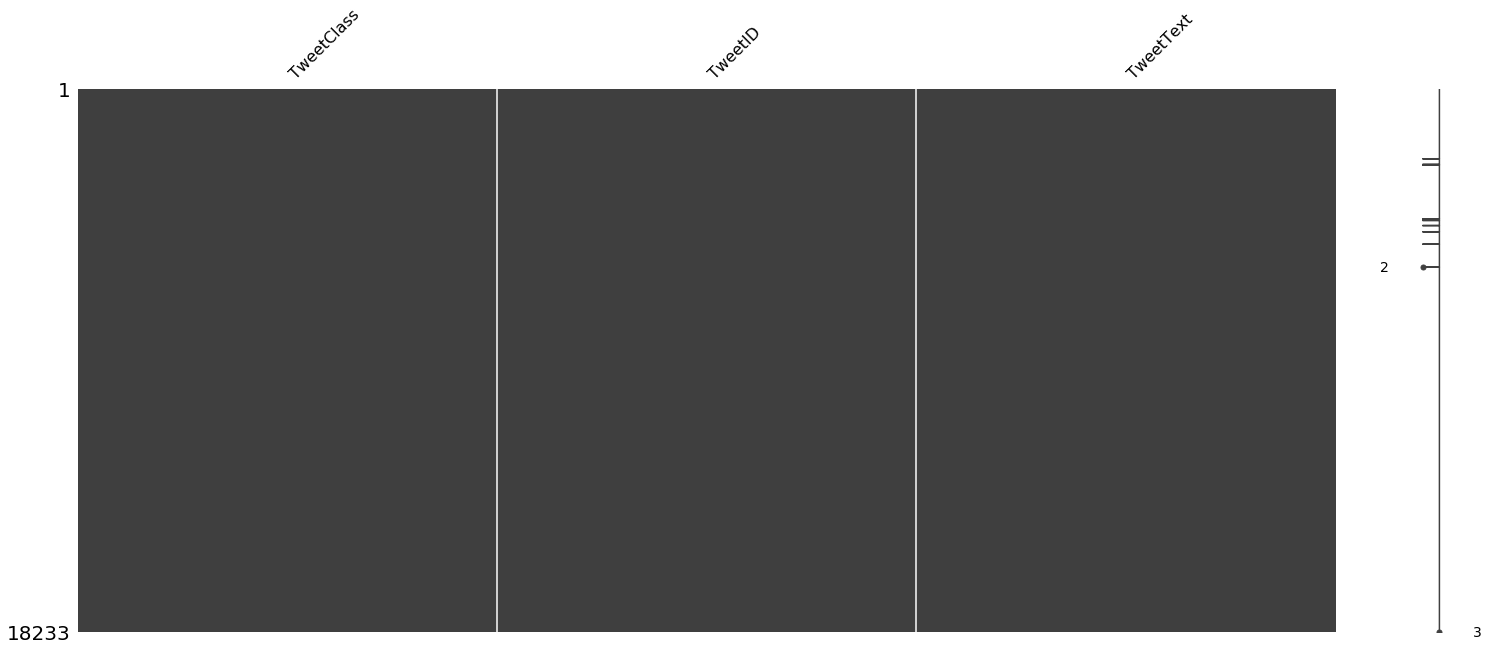

In [11]:
msno.matrix(data)

<h4>We see that there are no missing values</h4>

<h2>Checking Occurance of each category</h2>

In [12]:
TweetCounts = data['TweetClass'].value_counts()
TweetCounts

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

<b>From above output, we can see that there are a lot of irrelevant tweets(class 0) and a few Needed and Availablity Tweets</b>

In [13]:
d = data.duplicated()
d.value_counts()

False    18233
dtype: int64

In [14]:
data.loc[d,:]

,TweetClass,TweetID,TweetText


<h4>There are no duplicate values.</h4>

<h2>Exploratory Data Analysis</h2>

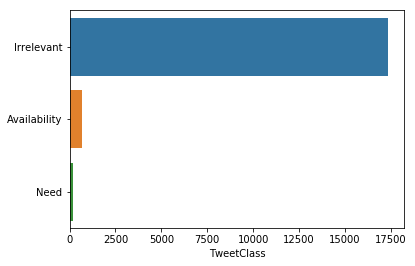

In [15]:
sns.barplot( x = TweetCounts , y = ["Irrelevant", 'Availability','Need'],)

<h3>We divide the Tweet Classes now.</h3>

In [16]:
irrelevant_Tweets = data[data['TweetClass']==0]
need_Tweets = data[data['TweetClass']==1]
available_Tweets = data[data['TweetClass']==2]

In [17]:
irrelevant_Tweets.describe()

,TweetClass,TweetID
count,17370.0,1.737000e+04
mean,0.0,5.923730e+17
std,0.0,2.855980e+14
min,0.0,5.916721e+17
25%,0.0,5.921606e+17
50%,0.0,5.925236e+17
75%,0.0,5.926023e+17
max,0.0,5.927001e+17


In [18]:
need_Tweets.describe()

,TweetClass,TweetID
count,199.0,1.990000e+02
mean,1.0,5.893801e+17
std,0.0,4.158937e+16
min,1.0,5.644655e+15
25%,1.0,5.922106e+17
50%,1.0,5.923036e+17
75%,1.0,5.925072e+17
max,1.0,5.926977e+17


In [19]:
available_Tweets.describe()

,TweetClass,TweetID
count,664.0,6.640000e+02
mean,2.0,5.914151e+17
std,0.0,2.296574e+16
min,2.0,5.435337e+14
25%,2.0,5.921793e+17
50%,2.0,5.923089e+17
75%,2.0,5.923938e+17
max,2.0,5.926990e+17


In [20]:
data['TweetClass'].value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

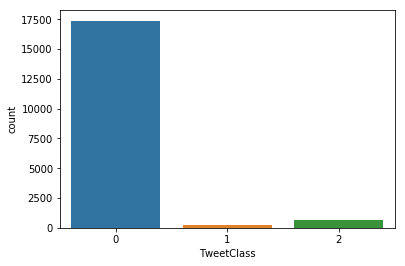

In [21]:
sns.countplot(x='TweetClass',data=data)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

irrelevant_vect=CountVectorizer(stop_words='english') #Filtering non-relevent Tweets
need_vect=CountVectorizer(stop_words='english') # Filtering Needing Tweets
available_vect=CountVectorizer(stop_words='english') # Filtering Availability Tweets
irrelevant_dtm=irrelevant_vect.fit_transform(irrelevant_Tweets['TweetText'].values.astype('U')) #Removing: Stop word in Irrelevant tweets like a,is,the,you...
need_dtm=need_vect.fit_transform(need_Tweets['TweetText'].values.astype('U')) # Removing Stop word in Need Tweets
available_dtm=available_vect.fit_transform(available_Tweets['TweetText'].values.astype('U')) 
irrelevant_word=irrelevant_vect.get_feature_names()
irrelevant_freqs=irrelevant_dtm.sum(axis=0).A1
irrelevant_result=dict(zip(irrelevant_word,irrelevant_freqs))
print(len(irrelevant_word))

16451


In [23]:
need_word=need_vect.get_feature_names()
need_freqs=need_dtm.sum(axis=0).A1
need_result=dict(zip(need_word,need_freqs))
print(len(need_word))

available_word=available_vect.get_feature_names()
available_freqs=available_dtm.sum(axis=0).A1
available_result=dict(zip(available_word,available_freqs))
print(len(available_word))

755
1581


<h2>Visualizing By Wordcloud</h2>

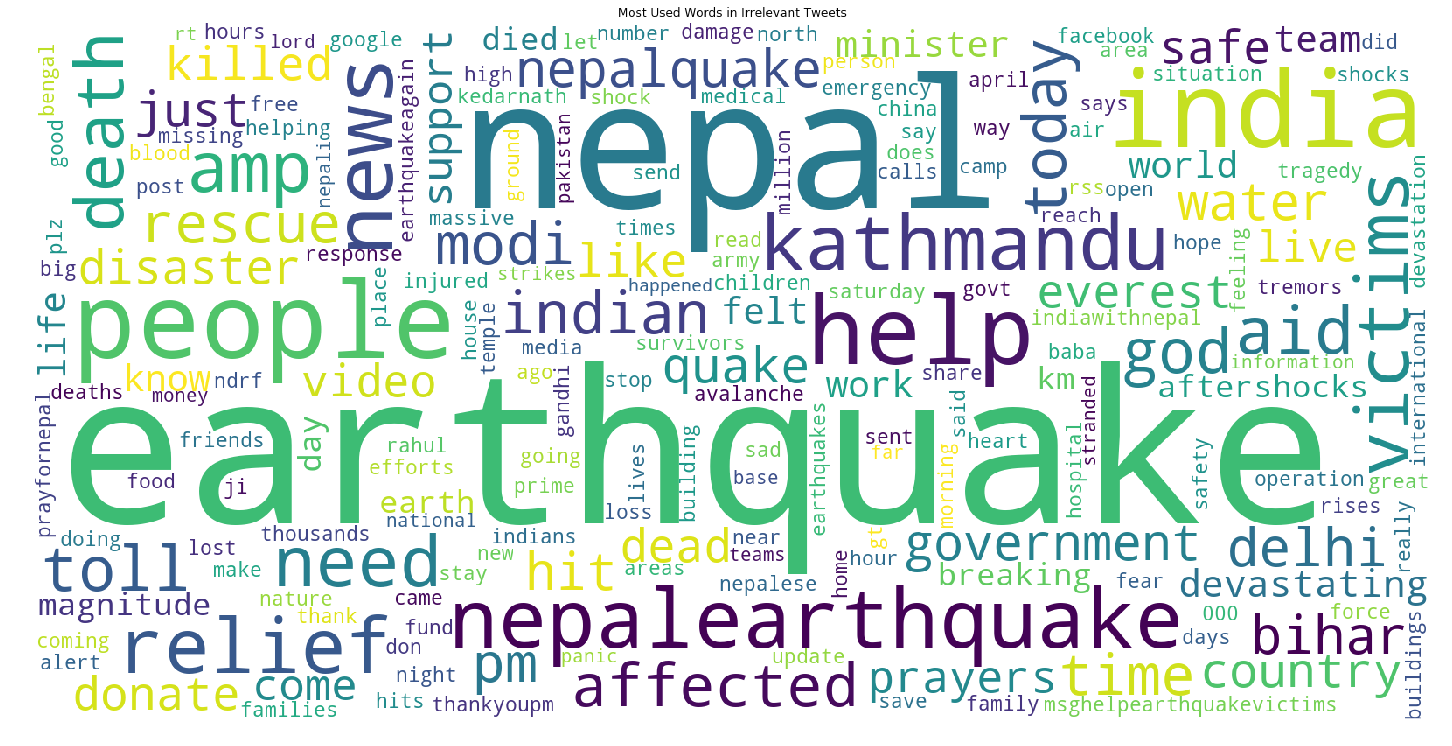

In [24]:
wordcloud=WordCloud(background_color='white',
                   width=1600,
                   height=800).generate_from_frequencies(irrelevant_result)
fig=plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most Used Words in Irrelevant Tweets")
plt.show()

<b>These are most common words used in irrelevant Tweets</b>

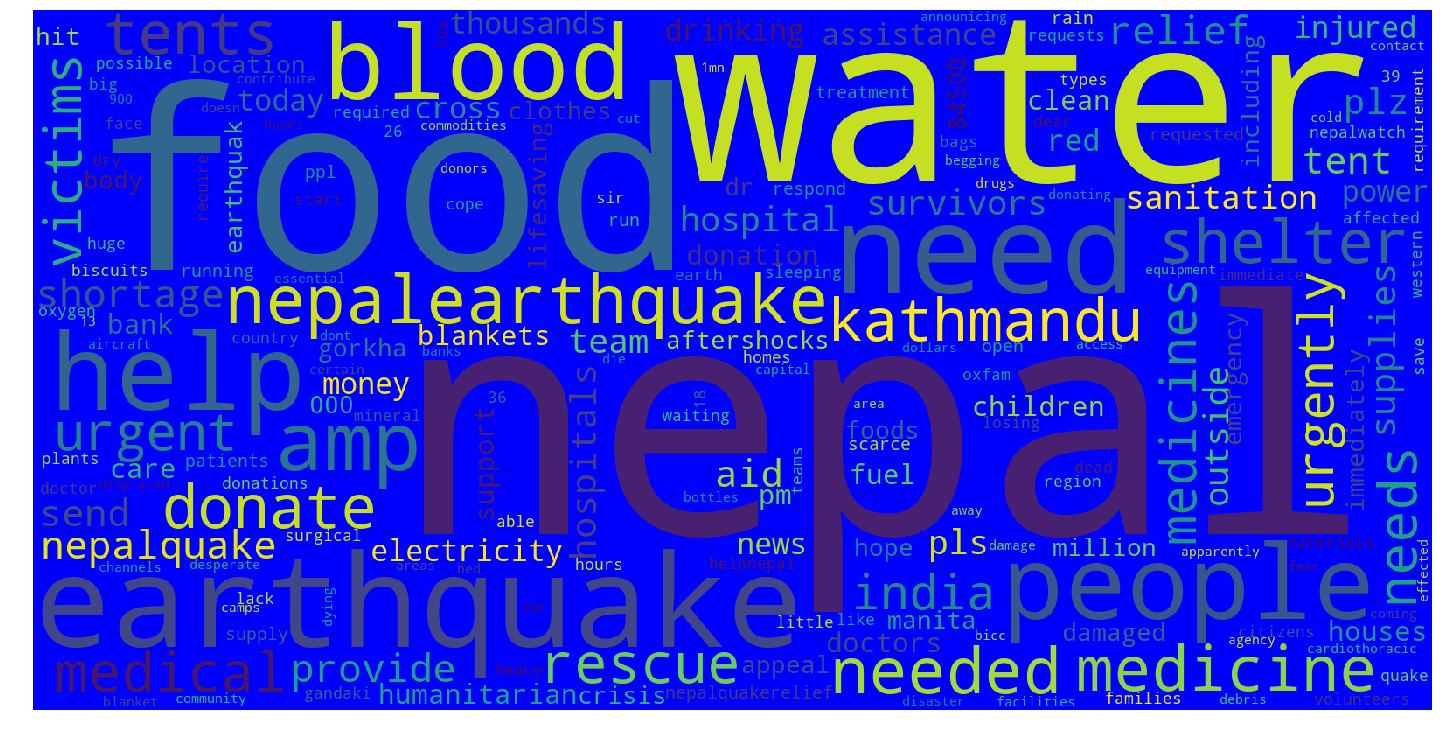

In [25]:
wordcloud=WordCloud(background_color='blue',
                   width=1600,
                   height=800).generate_from_frequencies(need_result)
fig=plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<b>These are most common words used in Need Tweets</b>

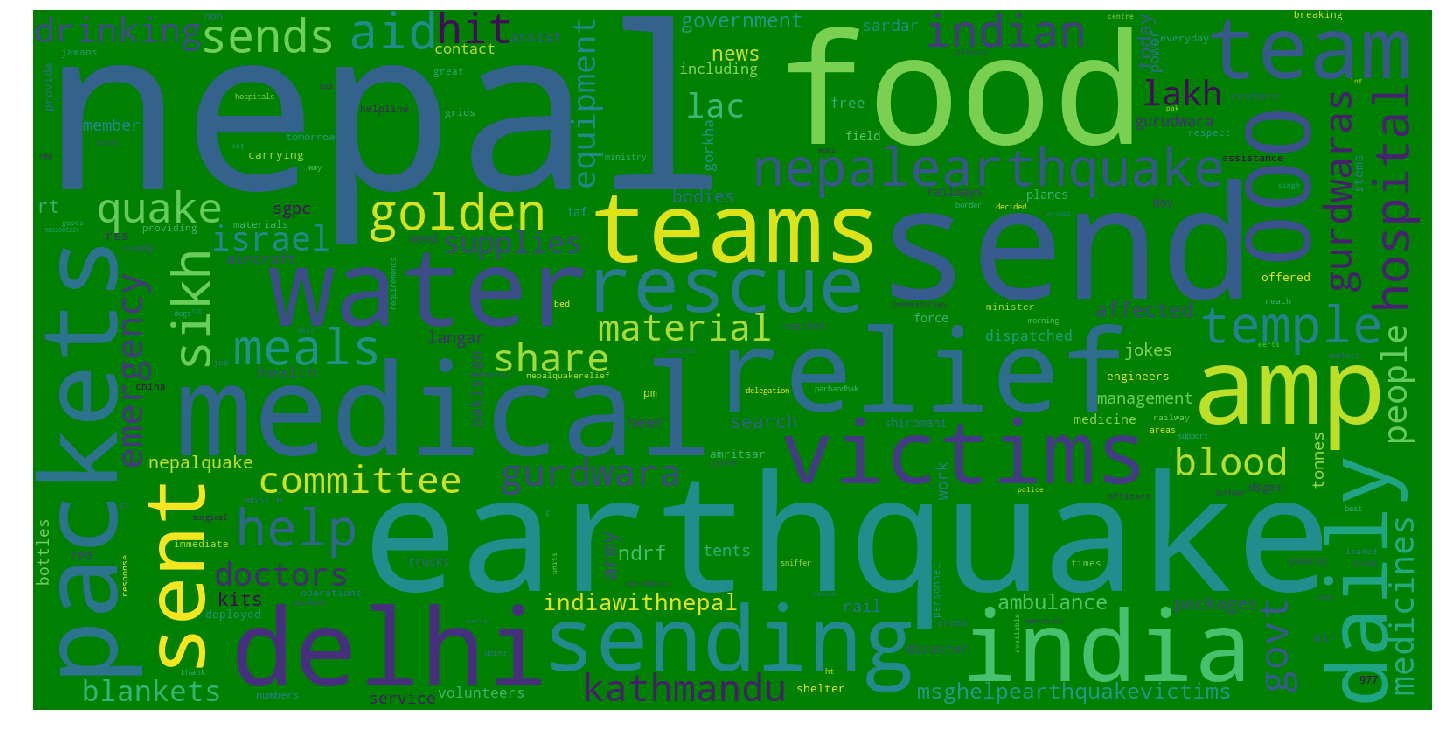

In [26]:
wordcloud=WordCloud(background_color='green',
                   width=1600,
                   height=800).generate_from_frequencies(available_result)
fig=plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<b>These are most common words used in Available Tweets</b>

In [27]:
x = data['TweetText']
y = data['TweetClass']

<h2>Using TF-IDF</h2>

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True)

dtm = vectorizer.fit_transform(x.values.astype('U'))

print(dtm)

  (0, 10057)	0.04972618198417974
  (0, 10171)	0.12249924202290202
  (0, 702)	0.30019129713017745
  (0, 15090)	0.06561019724465086
  (0, 2136)	0.5861677323433521
  (0, 12236)	0.29308386617167603
  (0, 3028)	0.21729202831083366
  (0, 10450)	0.07034080647432106
  (0, 10093)	0.17606934012644265
  (0, 10616)	0.29308386617167603
  (0, 14144)	0.17755876709276805
  (0, 12230)	0.30019129713017745
  (0, 5858)	0.11092581842442402
  (0, 8572)	0.22933395795100778
  (0, 14884)	0.15256876400654348
  (0, 1675)	0.28236675972986625
  (1, 10450)	0.10459414706584846
  (1, 14875)	0.18557246133053332
  (1, 9161)	0.47920193503681113
  (1, 11032)	0.15700185939298922
  (1, 9665)	0.40796609774726483
  (1, 13074)	0.26963316193129083
  (1, 11000)	0.30448990416843
  (1, 1101)	0.12878197899890942
  (1, 3388)	0.42716966169263665
  :	:
  (18231, 16177)	0.14423497098624397
  (18231, 9266)	0.21539786665452051
  (18231, 5708)	0.14540054356342985
  (18231, 6694)	0.11299532363244512
  (18231, 2275)	0.17815877304604064
  (

<h2>Standardizing data for Feature Transformation</h2>

In [31]:
from sklearn.preprocessing import StandardScaler
StandardScaler(with_mean=False).fit_transform(dtm)

<18233x17118 sparse matrix of type '<class 'numpy.float64'>'
	with 247537 stored elements in Compressed Sparse Row format>

<h2>Using chi squared feature selection for feature selection.</h2>

In [33]:
from sklearn.feature_selection import chi2
chi1,p1 = chi2(dtm,y)
print(chi1,p1)

[1.45268895e+01 1.41660328e+02 5.25089987e-02 ... 1.55859460e-02
 1.55859460e-02 1.55859460e-02] [7.00690184e-04 1.73320735e-31 9.74087154e-01 ... 9.92237313e-01
 9.92237313e-01 9.92237313e-01]


<h2>Using stratified shuffled split for the split of skewed data</h2>

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print(sss.get_n_splits(dtm, y))
for train_index, test_index in sss.split(dtm, y):
    x_train, x_test = dtm[train_index], dtm[test_index]
    y_train, y_test = y[train_index], y[test_index]
print(x_train)

5
  (0, 16235)	0.4224937629600894
  (0, 4875)	0.38009007139448514
  (0, 5998)	0.47684886230759976
  (0, 12127)	0.3577564933554035
  (0, 6823)	0.36891869369427066
  (0, 845)	0.3240269252767819
  (0, 4736)	0.073228224602717
  (0, 5725)	0.16734445045024274
  (0, 7226)	0.1126689512552589
  (0, 14875)	0.11219988254624594
  (0, 15090)	0.11797235601055248
  (0, 10057)	0.08941163249682882
  (1, 4752)	0.45904800846139077
  (1, 16449)	0.5183086519953682
  (1, 16427)	0.42465467621398095
  (1, 15142)	0.5519585177673593
  (1, 4736)	0.10288126633480417
  (1, 7226)	0.15829312324097064
  (2, 9695)	0.4708245386914513
  (2, 16251)	0.39614917391778043
  (2, 13300)	0.3503649925414982
  (2, 6303)	0.349036786511724
  (2, 16058)	0.30132613359037236
  (2, 5728)	0.2870144551812087
  (2, 13309)	0.34063718208108174
  :	:
  (12760, 7624)	0.2596529861085222
  (12760, 14875)	0.06613226804044045
  (12760, 15090)	0.0695346491636159
  (12761, 2403)	0.5243809026255296
  (12761, 8022)	0.5600005852422573
  (12761, 4736)	

<h2>Classification Techiniques</h2>

<b>Logistic Regression</b>

In [39]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)
y_pred1=regressor.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
score1=accuracy_score(y_test,y_pred1)
print(score1)

0.9621572212065813


In [41]:
confusion_matrix(y_test,y_pred1)

array([[5196,    0,   15],
       [  55,    1,    4],
       [ 132,    1,   66]], dtype=int64)

<h2>Multinomial Naive Bayes</h2>

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred2 = nb.predict(x_test)

In [43]:
score2=accuracy_score(y_test,y_pred2)
print(score2)
print(confusion_matrix(y_test,y_pred2))

0.9531992687385741
[[5209    0    2]
 [  60    0    0]
 [ 194    0    5]]


<h2>Support Vector Machine(rbf)</h2>

In [45]:
from sklearn.svm import SVC
m = SVC(kernel='rbf')
m.fit(x_train,y_train)
y_pred3 = m.predict(x_test)

In [46]:
score3 = accuracy_score(y_test,y_pred3)
print(score3)
print(confusion_matrix(y_test,y_pred3))

0.9526508226691042
[[5211    0    0]
 [  60    0    0]
 [ 199    0    0]]


<h2>Support Vector Machine(linear)</h2>

In [47]:
from sklearn.svm import SVC
li = SVC(kernel='linear')
li.fit(x_train,y_train)
y_pred4 = li.predict(x_test)

In [48]:
score4 = accuracy_score(y_test,y_pred4)
print(score4)
print(confusion_matrix(y_test,y_pred4))

0.9683729433272394
[[5170    4   37]
 [  43   15    2]
 [  84    3  112]]


<h2>Decision Tree</h2>

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)
y_pred5 = dt.predict(x_test)

In [50]:
score5=accuracy_score(y_test,y_pred5)
print(score5)
print(confusion_matrix(y_test,y_pred5))

0.956672760511883
[[5101   28   82]
 [  35   16    9]
 [  75    8  116]]


<h2>Random Forest</h2>

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini')
rf.fit(x_train,y_train)
y_pred6 = rf.predict(x_test)

In [52]:
score6=accuracy_score(y_test,y_pred5)
print(score6)
print(confusion_matrix(y_test,y_pred6))

0.956672760511883
[[5186    2   23]
 [  49   10    1]
 [ 116    0   83]]


<h2>Compairing the Accuracy of the Algorithms</h2>

In [53]:
import pandas as pd
import seaborn as sns

Accuracy = [score1,score2,score3,score4,score5,score6]

Algo = ['Logistic Regression','Multinomial Naive Bayes','SVM(rbf)','SVM(linear)','Decision Tree','Random Forest']

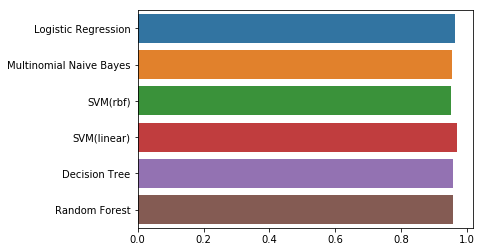

In [54]:
sns.barplot(x=Accuracy,y=Algo)